# Topics
-----------------------------
## Prequel
<ul>
    <li>Introduction to Generators & Decorators</li>
</ul>
<h2>Dask</h2>

<ul>
    <li> Parallelizing the traditional pandas pipeline</li>
    <li> Dask Arrays</li>
</ul>
   

## Generators

In [40]:
# Simple generator
"""
If a function contains at least one yield statement (it may contain other yield or return statements), 
it becomes a generator function. Both "yield" and "return" will return some value from a function.

Here is how a generator function differs from a normal function.

--Generator function contains one or more yield statement.
--When called, it returns an object (iterator) but does not start execution immediately.
--Methods like __iter__() and __next__() are implemented automatically. So we can iterate through the items using next().
--Once the function yields, the function is paused and the control is transferred to the caller.
--Local variables and their states are remembered between successive calls.
--Finally, when the function terminates, StopIteration is raised automatically on further calls.
"""
def my_gen():
    n = 1
    print('This is printed first')
    yield n

    n += 1
    print('This is printed second')
    yield n

    n += 1
    print('This is printed at last')
    yield n

In [41]:
gen = my_gen()
print(type(gen))
#next(gen)
#next(gen)
#next(gen)
#next(gen)

<class 'generator'>


In [42]:
"""
This is how we create generators on the fly
"""
my_list =[1,2,3,4,5,6]
gen = (x**2 for x in my_list)
print(type(gen))
for i in gen:
    print(i)

<class 'generator'>
1
4
9
16
25
36


In [43]:
next(gen)

StopIteration: 

In [44]:
"""
Generator expression can be used inside functions. 
When used in such a way, the round parentheses can be dropped.
"""
print(sum(x**2 for x in my_list))
print(max(x**2 for x in my_list))

91
36


## Decorators

In [45]:
"""
Python has an interesting feature called decorators to add functionality to an existing code.
This is also called metaprogramming as a part of the program tries to modify another part of the program at compile time.

Functions can be passed as arguments to another function.

Such function that take other functions as arguments are also called higher order functions. 
Here is an example of such a function.
"""
def inc(x):
    return x + 1

def dec(x):
    return x - 1

def operate(func, x):
    result = func(x)
    return result

print(operate(inc,3))
print(operate(dec,3))

4
2


In [46]:
"""
Furthermore, a function can return another function.

Here, is_returned() is a nested function which is defined and returned, each time we call is_called().
"""
def is_called():
    def is_returned():
        print("Hello")
    return is_returned

new = is_called()
#Outputs "Hello"
new()

Hello


In [47]:
def make_pretty(func):
    def inner():
        print("I got decorated")
        func()
    return inner

def ordinary():
    print("I am ordinary")
    
ordinary()
# let's decorate this ordinary function
pretty = make_pretty(ordinary)
pretty()

I am ordinary
I got decorated
I am ordinary


In [48]:
@make_pretty
def ordinary():
    print("I am ordinary")

#ordinary()

In [49]:
import dask
from dask import delayed

@delayed
def increament(x):
    return x+1

@delayed
def double(x):
    return 2*x

@delayed
def add(x,y):
    return x+y

data = [i for i in range(1,6)]
output = []

for i in data:
    a = increament(i)
    b = double(i)
    c = add(a,b)
    output.append(c)

total = sum(output)

print(total.compute())

50


## Dask

In [64]:
import pandas as pd
from sys import getsizeof
import matplotlib.pyplot as plt
import numpy as np
import dask.array as da
import dask.dataframe as dd
import time
import h5py


In [51]:
template = "./flightdelays/flightdelays-2016-{:d}.csv"
filenames = [template.format(i) for i in range(1,6)]

In [52]:
def pct_delayed(df):
    # Compute number of delayed flights: n_delayed
    n_delayed = (df['DEP_DELAY']>0).sum()
    # Return percentage of delayed flights
    return n_delayed*100/len(df)

88


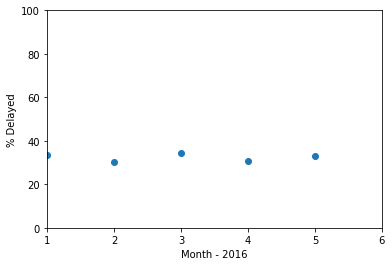

In [53]:
dataframes = (pd.read_csv(file) for file in filenames)
monthly_delayed = [pct_delayed(df) for df in dataframes]
print(getsizeof(dataframes))
x = range(1,6)
plt.plot(x, monthly_delayed, marker='o', linewidth=0)
plt.ylabel('% Delayed')
plt.xlabel('Month - 2016')
plt.xlim((1,6))
plt.ylim((0,100))
plt.show()

In [54]:
@delayed
def pct_delayed(df):
    # Compute number of delayed flights: n_delayed
    n_delayed = df.DEP_DELAY >0
    n_delayed = sum(n_delayed)
    # Return percentage of delayed flights
    return n_delayed*100/len(df)

@delayed
def read_file(fname):
    return pd.read_csv(fname)

In [55]:
delayed = [pct_delayed(read_file(fname)) for fname in filenames]

In [56]:
total_delayed = sum(delayed)
total_delayed.compute()

161.79578377252975

## Dask Arrays

In [59]:
data = np.arange(20000)
dask_data = da.from_array(data, chunks=len(data)//4)
print(dask_data.chunks)
print(dask_data.mean().compute())
print(dask_data.mean())

((5000, 5000, 5000, 5000),)
9999.5
dask.array<mean_agg-aggregate, shape=(), dtype=float64, chunksize=()>


## Dask DataFrames